In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [1]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_percentiles_RTC_percentile.csv'

In [3]:
myData = pd.read_csv(dataFile)

### Add useful transformations

In [4]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [5]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [6]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,file,original cell name,Amy_mod,movie,x,...,exp_folder,hetChrom_newctl_volume,hetChrom_newctl_ch1,hetChrom_newctl_ch2,hetChrom_newctl_ch3,hetChrom_newctl_10_ch1,hetChrom_newctl_10_ch2,hetChrom_newctl_10_ch3,age_track,day
0,0,0,0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,...,20190625-MSL rename,280370,5.739116e+09,3.726297e+09,9.123801e+09,4.675327e+09,3.218432e+09,5.228717e+09,0.666667,d20190625
1,1,1,1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,...,20190625-MSL rename,250606,5.403750e+09,3.628343e+09,8.997863e+09,4.906872e+09,3.386833e+09,7.001022e+09,0.666667,d20190625
2,2,2,2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,...,20190625-MSL rename,189925,6.729417e+09,4.442309e+09,1.076495e+10,6.005276e+09,4.103693e+09,8.205601e+09,2.000000,d20190625
3,3,3,3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,...,20190625-MSL rename,220076,5.459073e+09,3.733122e+09,9.257708e+09,4.959865e+09,3.488090e+09,7.446520e+09,2.000000,d20190625
4,4,4,4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,...,20190625-MSL rename,436430,8.007695e+09,4.024894e+09,1.674243e+10,6.700023e+09,3.680820e+09,1.266726e+10,19.500000,d20190625


In [7]:
indexNames = myData[ myData['hetChrom_newctl_volume'] == 0 ].index

In [8]:
myData=myData.drop(indexNames)

In [9]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [84]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [11]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [12]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

# plots for deconvolved

## original

<IPython.core.display.Javascript object>


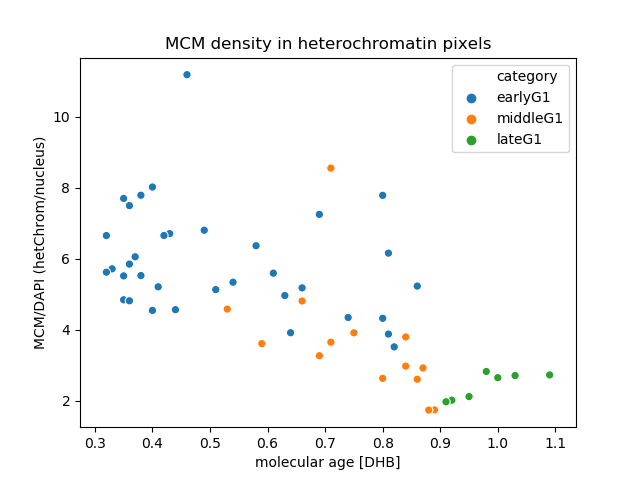

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [13]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


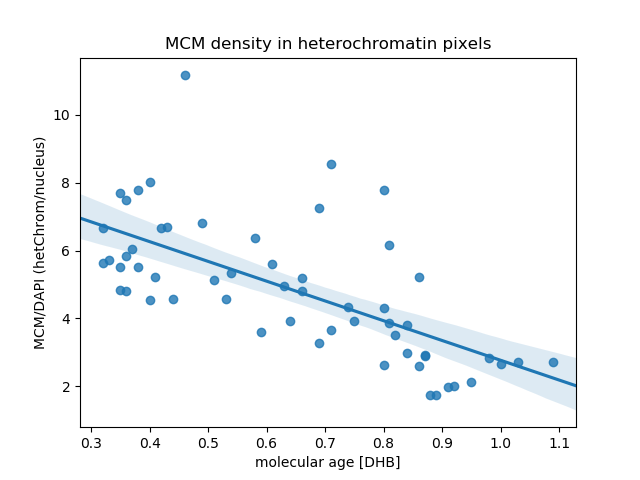

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [23]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [15]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [16]:
myTrendData=myTrendData.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## Modification

### modification = 0.3

In [17]:
mod=0.3

In [18]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


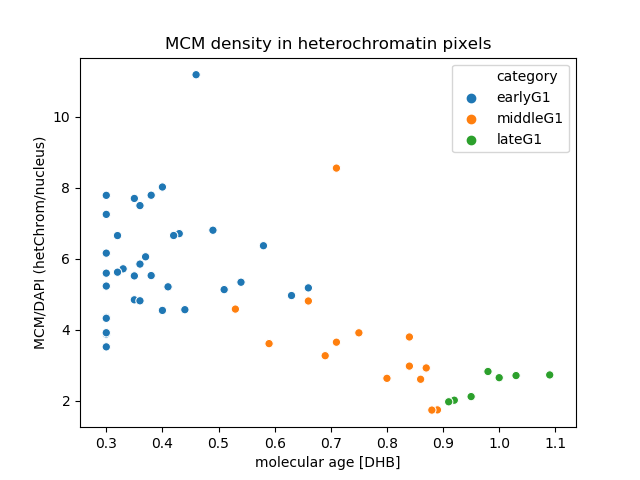

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [24]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


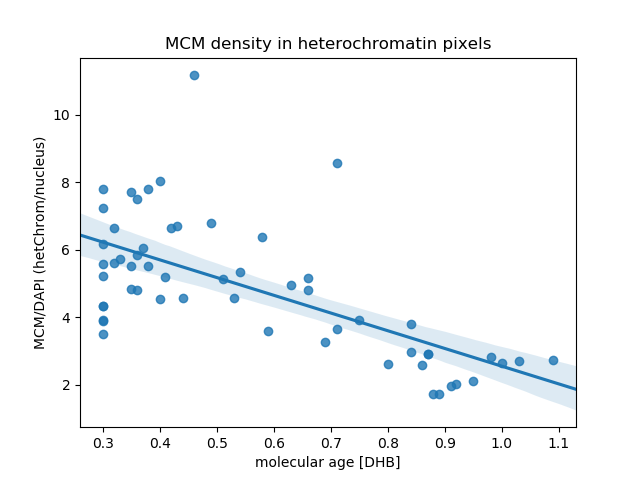

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [25]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [26]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [27]:
myTrendData=myTrendData.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0

In [28]:
mod=0

In [29]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


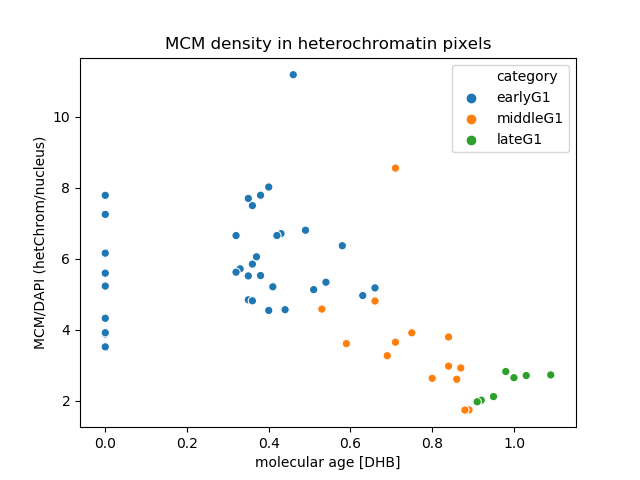

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [30]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


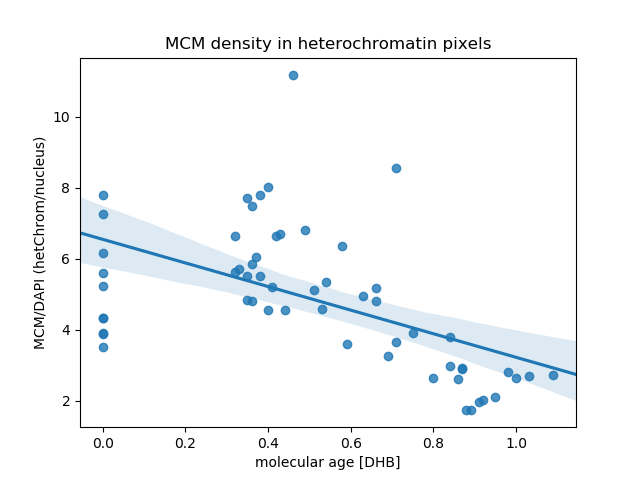

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [31]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [32]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [33]:
myTrendData=myTrendData.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [34]:
mod=0.5

In [35]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


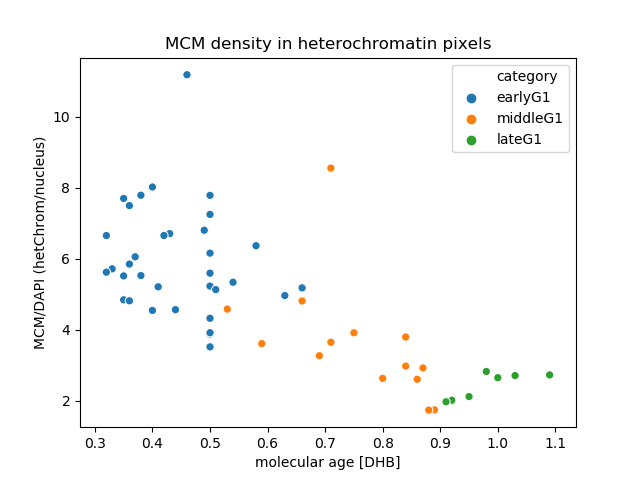

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [36]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


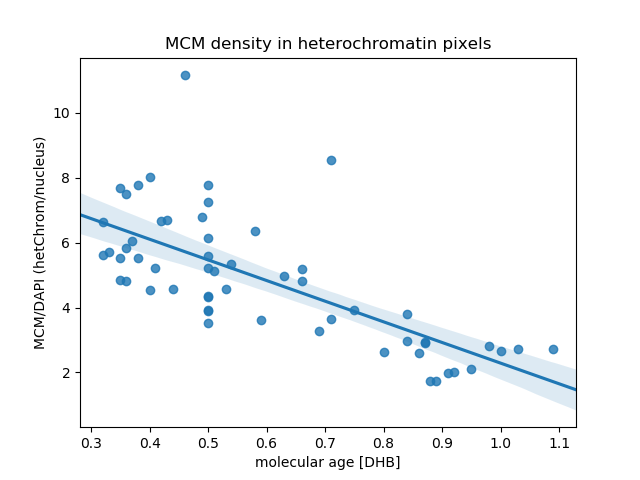

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [37]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [38]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [39]:
myTrendData=myTrendData.append(pd.Series(['0.5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification

In [40]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']

In [41]:
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

<IPython.core.display.Javascript object>


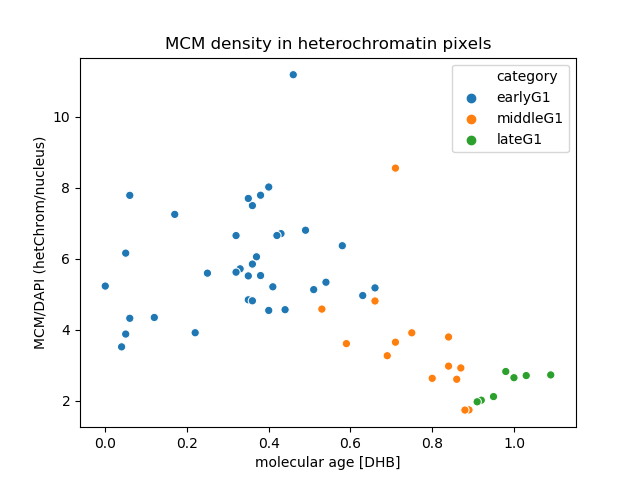

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [42]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


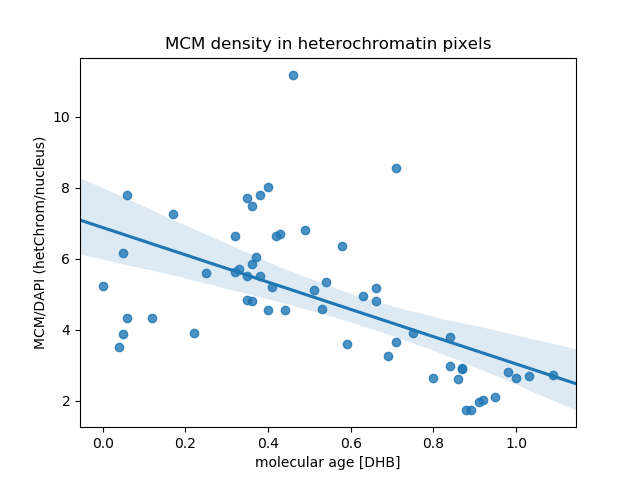

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [43]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_10_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_10_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [44]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [46]:
myTrendData=myTrendData.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# plots for not deconvolved

## original

<IPython.core.display.Javascript object>


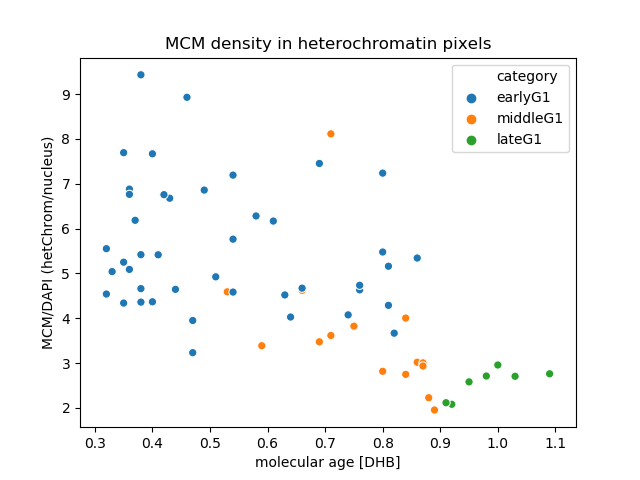

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [85]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


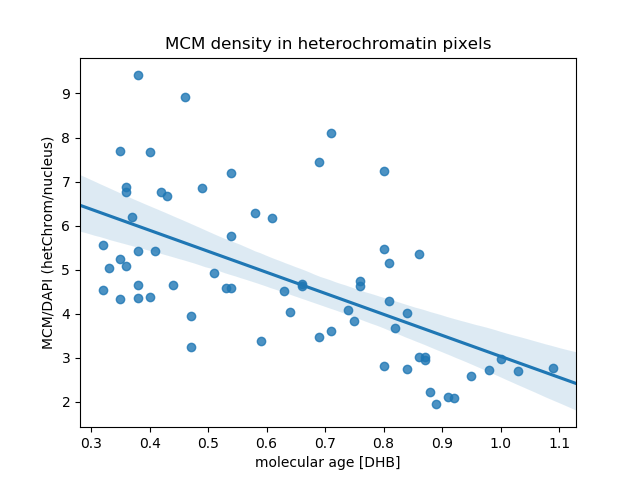

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [86]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [82]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [88]:
myTrendDatand=myTrendDatand.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2, False], index=myTrendData.columns),ignore_index=True)

## modification

### modification = 0.3

In [89]:
mod=0.3

In [90]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


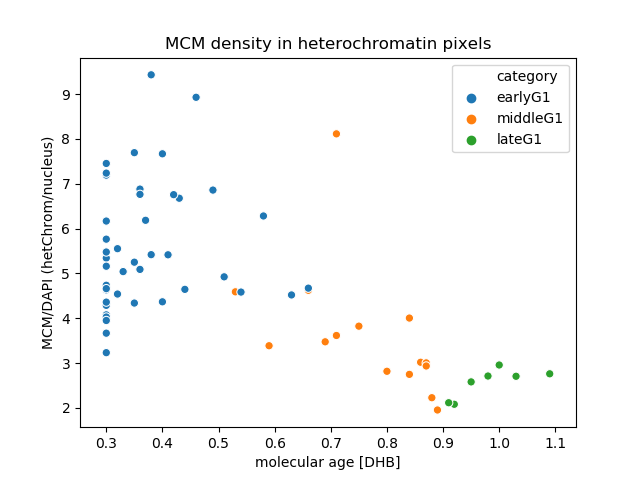

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [91]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


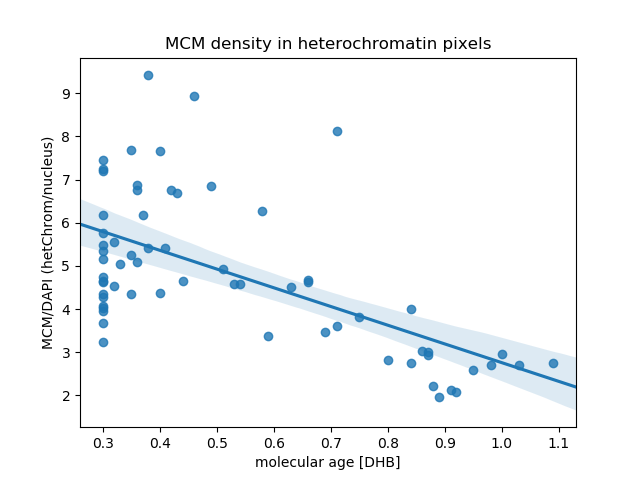

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [92]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [93]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [94]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2, False], index=myTrendData.columns),ignore_index=True)

### modification = 0

In [95]:
mod=0

In [96]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


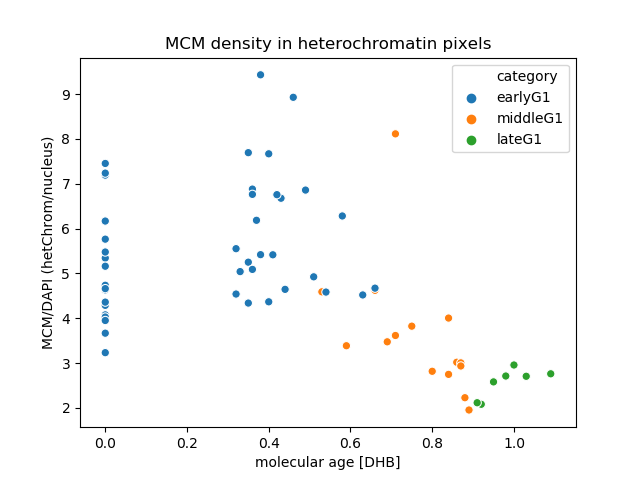

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [97]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


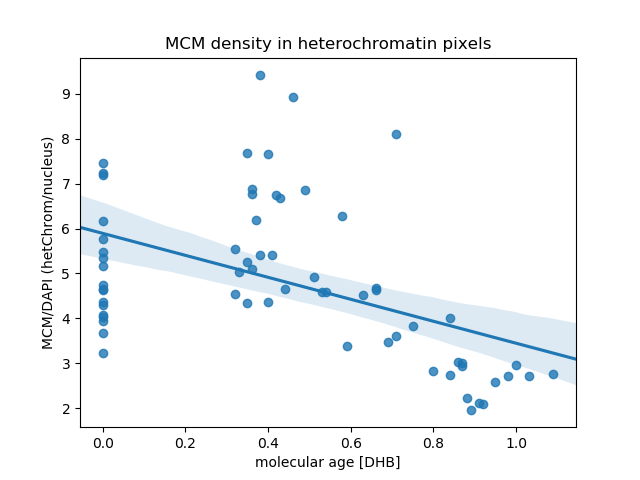

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [98]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [99]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [100]:
myTrendDatand=myTrendDatand.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2, False], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [101]:
mod=0.5

In [102]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


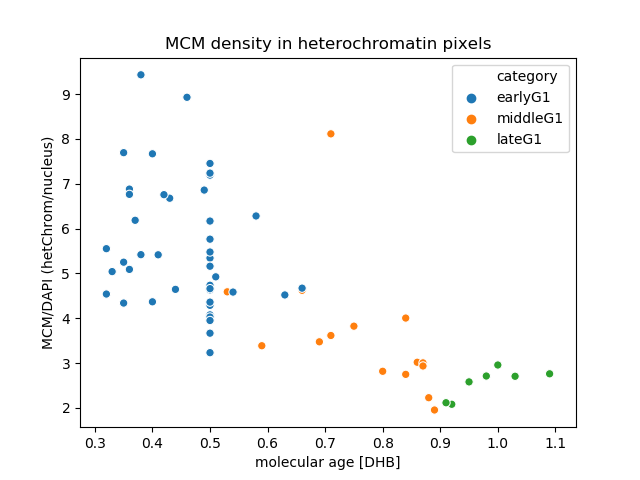

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [103]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


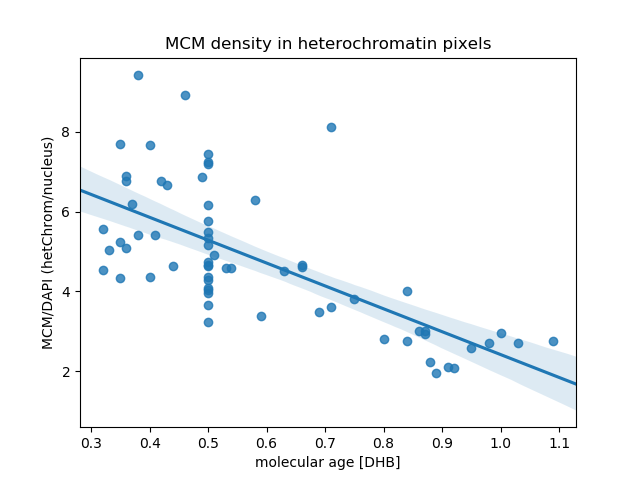

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [104]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [105]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [106]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2, False], index=myTrendData.columns),ignore_index=True)

### amy modification

In [107]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd_mol_age_change=myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=-1*myDataSelnd['mol_age_mod']+np.max(myDataSelnd_mol_age_change)

<IPython.core.display.Javascript object>


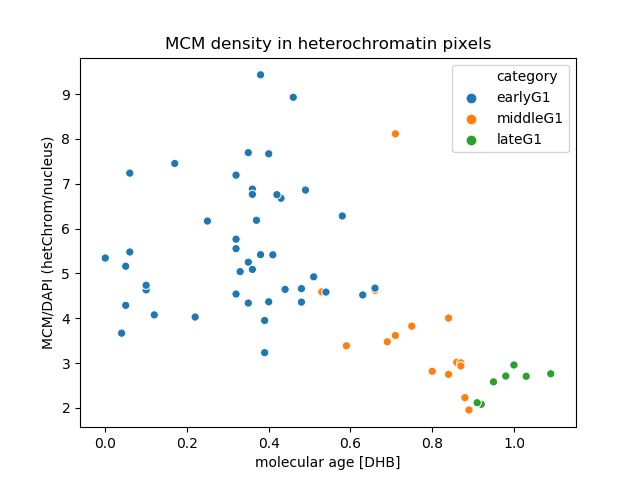

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [108]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


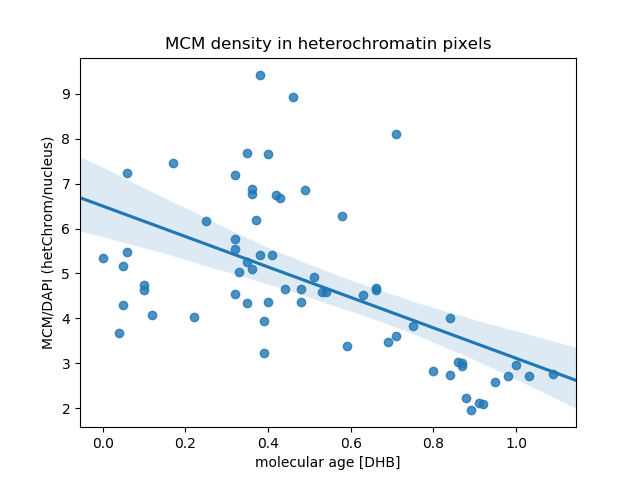

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [109]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_10_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_10_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [111]:
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [112]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2, False], index=myTrendData.columns),ignore_index=True)

# review

In [113]:
myTrendData['pvalue significance']=True
for i, mod in myTrendData.iterrows():
    if myTrendData.at[i,'pvalue']>0.05:
        myTrendData.at[i,'pvalue significance']=False

In [114]:
myTrendDatand['pvalue significance']=True
for i, mod in myTrendDatand.iterrows():
    if myTrendDatand.at[i,'pvalue']>0.05:
        myTrendDatand.at[i,'pvalue significance']=False

In [115]:
myTrendData=myTrendData.sort_index(by='rsquared',ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [116]:
myTrendData

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
4,amy_mod,-0.301696,5.013431,-0.043521,0.642737,0.648649,0.001894,False
3,0.5,-0.436692,5.123699,-0.055173,0.556367,0.740172,0.003044,False
1,0.3,-0.598629,5.226891,-0.080492,0.390377,0.694288,0.006479,False
2,0,-0.707175,5.277521,-0.108352,0.246961,0.607676,0.011740,False
0,original,1.646375,2.566286,0.214881,0.020536,0.700829,0.046174,True


In [117]:
myTrendDatand

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original,-0.603454,5.158881,-0.085217,0.344710,0.636186,0.007262,False
1,0.3,-0.632953,5.142925,-0.097859,0.277604,0.580400,0.009576,False
2,0,-0.675201,5.135794,-0.123716,0.169261,0.488319,0.015306,False
3,0.5,-0.502179,5.072324,-0.071232,0.429877,0.634053,0.005074,False
4,amy_mod,-0.502179,5.072324,-0.071232,0.429877,0.634053,0.005074,False
5,amy_mod,-0.430866,5.000614,-0.070977,0.431534,0.545977,0.005038,False
